# Pathway enrichment in MAFA mutant T1
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/S64F_gene_count.txt', index_col=18, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAS64F_001,611586,314216,328546,267945,135623,122556,169291,198632,113766,95446,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_002,575049,409669,243106,184948,187221,88068,124960,108400,116860,134805,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_003,824730,218574,321668,278746,92467,111493,152005,118341,80843,71644,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_004,858370,262758,351032,358769,109622,134079,175299,232638,115243,58507,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_005,828227,500390,312265,281623,228104,110909,158423,149446,154143,164299,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_006,882622,241947,252381,210988,113488,104409,103355,75316,88540,91730,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_007,698088,281983,336437,280200,118392,117157,164344,222087,105979,86190,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_008,695656,403657,227741,176757,183399,79146,98225,93109,120291,131636,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_009,656783,205008,214125,229070,97473,115874,111309,52115,74326,77237,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_010,992861,158438,381157,341457,70606,135710,161331,154493,49674,52146,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData_Mut.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAS64F_001,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_002,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_003,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_004,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_005,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_006,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_007,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_008,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_009,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAS64F_001,Control,T0,N
MAFAS64F_002,Control,T0,N
MAFAS64F_003,Control,T0,N
MAFAS64F_004,Control,T2,Y
MAFAS64F_005,Control,T2,Y
MAFAS64F_006,Control,T2,Y
MAFAS64F_007,Control,T1,Y
MAFAS64F_008,Control,T1,Y
MAFAS64F_009,Control,T1,Y
MAFAS64F_010,MAFA,T0,N


In [6]:
# split data set by timepoint
# subset_t0 = adata[adata.obs.time_point == 'T0']
subset_t1 = adata[adata.obs.time_point == 'T1']
#subset_t2 = adata[adata.obs.time_point == 'T2']
# print("Subset for time point T0:")
# print(subset_t0)
# subset_t0.obs
print("\nSubset for time point T1:")
print(subset_t1)
# print("\nSubset for time point T2:")
# print(subset_t2)


Subset for time point T1:
View of AnnData object with n_obs × n_vars = 6 × 58735
    obs: 'condition', 'time_point', 'DOX'


## Quality Control

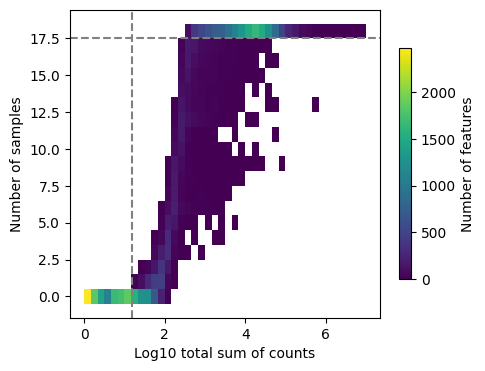

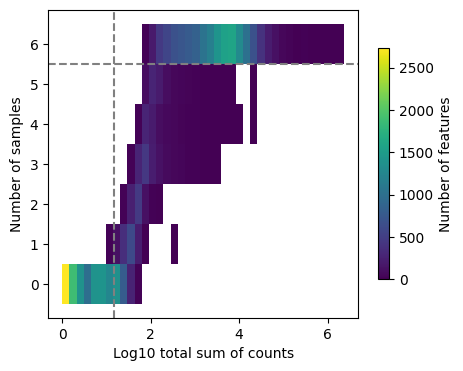

In [7]:
#check various filter points
#old
dc.plot_filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
dc.plot_filter_by_expr(subset_t1, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1,save='../figures/Mut/t1_QC.png')


In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(subset_t1, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

14787

In [9]:
# Filter by these genes
adata = subset_t1[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 6 × 14787
    obs: 'condition', 'time_point', 'DOX'

In [10]:
!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 61.53 seconds.

Fitting dispersion trend curve...
... done in 38.82 seconds.

Fitting MAP dispersions...
... done in 74.41 seconds.

Fitting LFCs...
... done in 5.69 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=["condition", 'MAFA', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...
... done in 6.05 seconds.



Log2 fold change & Wald test p-value: condition MAFA vs Control


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,392530.093750,-2.755416,0.165240,-16.675222,1.984732e-62,7.408163e-61
MT-CO1,233021.578125,-0.838117,0.271485,-3.087154,2.020828e-03,4.297204e-03
GCG,144593.828125,-3.057047,0.528564,-5.783685,7.308182e-09,2.900705e-08
INS,138477.296875,-2.196643,0.296995,-7.396228,1.401074e-13,7.928510e-13
MT-ND4,108428.742188,-0.696492,0.333033,-2.091361,3.649573e-02,6.070028e-02
...,...,...,...,...,...,...
GDF7,18.347105,0.375227,0.537996,0.697453,4.855192e-01,5.698316e-01
CATSPERE,14.551208,0.112992,0.307902,0.366975,7.136373e-01,7.772085e-01
STK24-AS1,15.531085,0.199339,0.300052,0.664349,5.064671e-01,5.899669e-01


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_MAFA_vs_Control')

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 17.00 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,392530.093750,-2.594342,0.173858,-16.675222,1.984732e-62,7.408163e-61
MT-CO1,233021.578125,1.857725,0.357097,-3.087154,2.020828e-03,4.297204e-03
GCG,144593.828125,-0.208707,0.566670,-5.783685,7.308182e-09,2.900705e-08
INS,138477.296875,-1.517798,0.345641,-7.396228,1.401074e-13,7.928510e-13
MT-ND4,108428.742188,-0.196117,0.351013,-2.091361,3.649573e-02,6.070028e-02
...,...,...,...,...,...,...
GDF7,18.347105,0.259008,0.493103,0.697453,4.855192e-01,5.698316e-01
CATSPERE,14.551208,-0.144270,0.795595,0.366975,7.136373e-01,7.772085e-01
STK24-AS1,15.531085,-0.144270,0.795595,0.664349,5.064671e-01,5.899669e-01


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,392530.093750,-2.594342,0.173858,-16.675222,1.984732e-62,7.408163e-61
MT-CO1,233021.578125,1.857725,0.357097,-3.087154,2.020828e-03,4.297204e-03
GCG,144593.828125,-0.208707,0.566670,-5.783685,7.308182e-09,2.900705e-08
INS,138477.296875,-1.517798,0.345641,-7.396228,1.401074e-13,7.928510e-13
MT-ND4,108428.742188,-0.196117,0.351013,-2.091361,3.649573e-02,6.070028e-02
...,...,...,...,...,...,...
GDF7,18.347105,0.259008,0.493103,0.697453,4.855192e-01,5.698316e-01
CATSPERE,14.551208,-0.144270,0.795595,0.366975,7.136373e-01,7.772085e-01
STK24-AS1,15.531085,-0.144270,0.795595,0.664349,5.064671e-01,5.899669e-01


In [19]:
!pip install adjustText

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


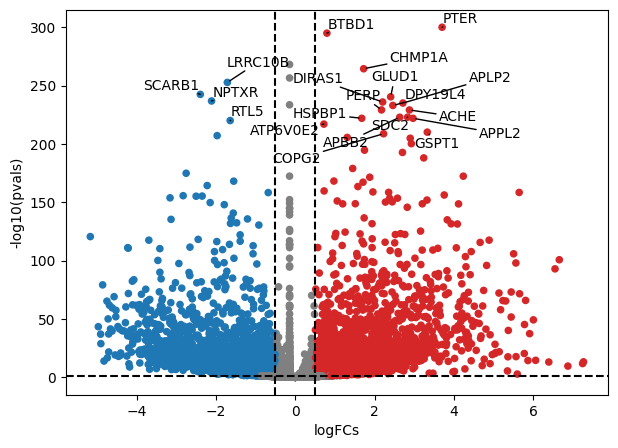

In [20]:
dc.plot_volcano_df(results_df, x='log2FoldChange', y='padj', top=20, save='../figures/Mut/t1_volcano.png')

In [21]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,AC092687.3,AP001453.3,AL138787.1,AC021321.1,THSD7B,GDF7,CATSPERE,STK24-AS1,PDCL3P4,CBR3
treatment.vs.control,-16.675222,-3.087154,-5.783685,-7.396228,-2.091361,0.046346,-8.002403,-2.27732,-2.544796,-3.911181,...,0.99227,0.917324,0.509647,-0.436742,0.345153,0.697453,0.366975,0.664349,0.262603,1.242621


### Transcription factor activity inference

In [22]:
collectri = dc.get_collectri(organism='human')
collectri

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


### Activity inference with Univariate Linear Model (ULM)

In [23]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

Running ulm on mat with 1 samples and 14787 targets for 631 sources.


,ABL1,AHR,AHRR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-0.989695,-3.327396,-0.860885,-0.060426,-0.767878,1.870562,0.213226,0.127285,-2.350878,-0.492433,...,-1.444214,-1.704743,-0.053727,-0.683187,-0.354064,0.882324,-0.021384,-0.696425,-0.614779,-0.135411


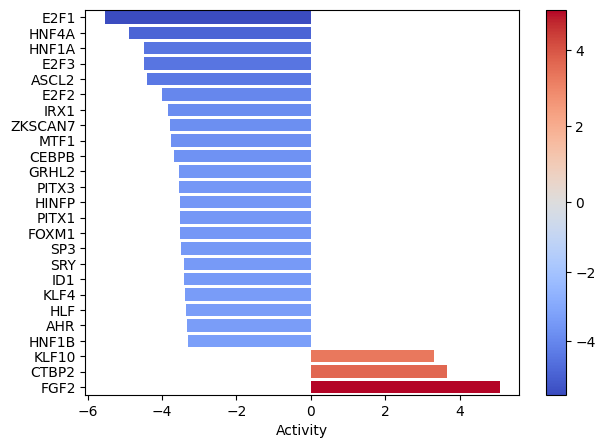

In [24]:
dc.plot_barplot(tf_acts, 'treatment.vs.control', top=25, vertical=True,save='../figures/Mut/t1_tf_activities.png')

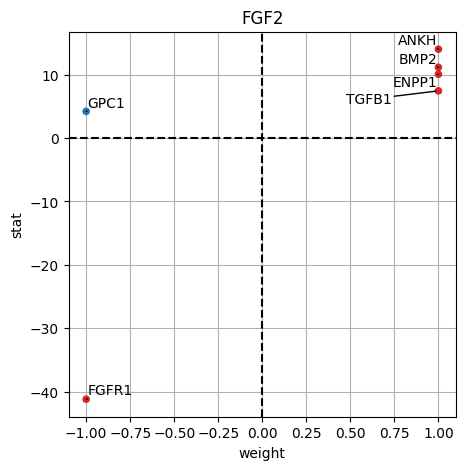

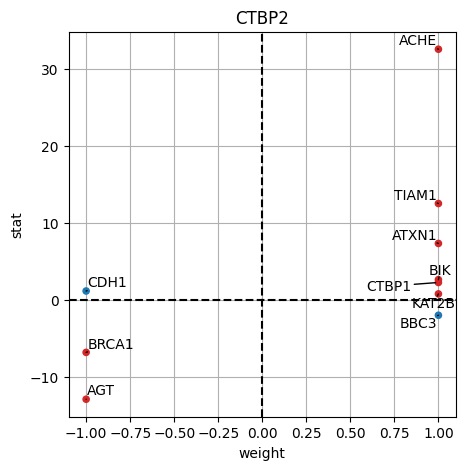

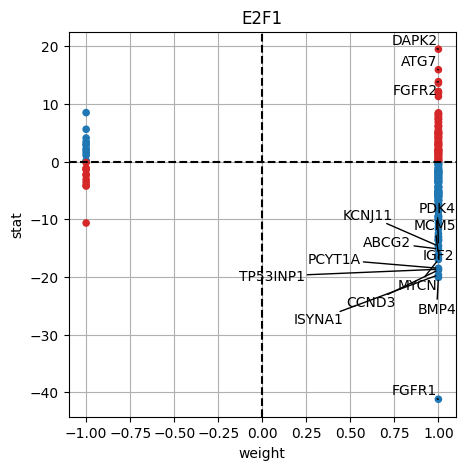

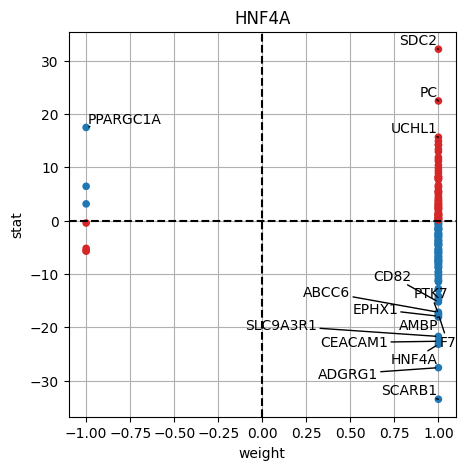

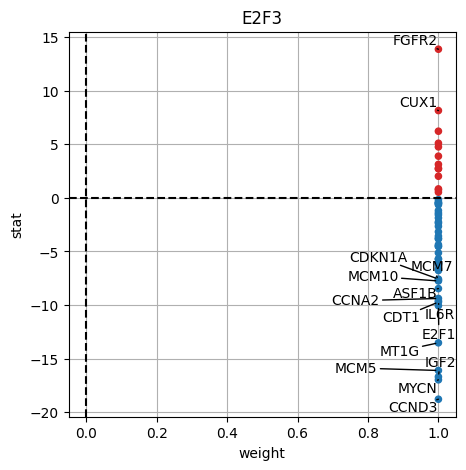

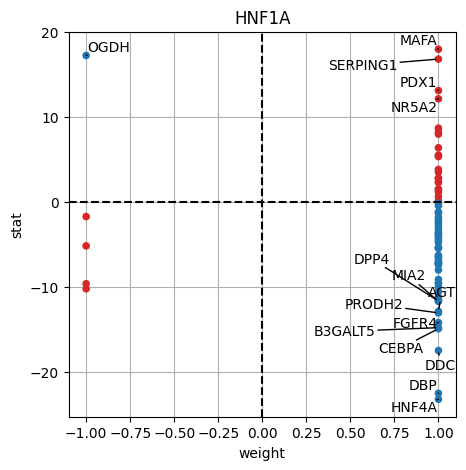

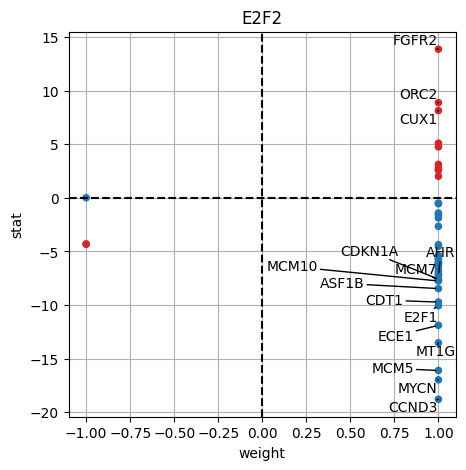

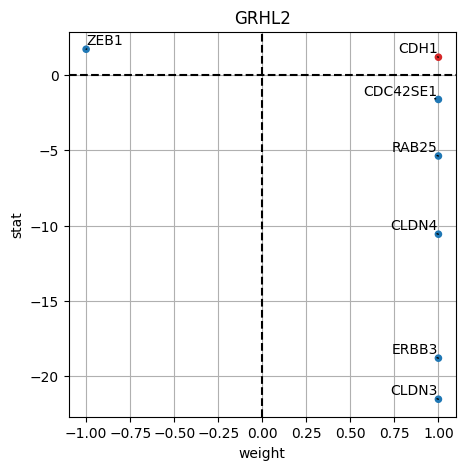

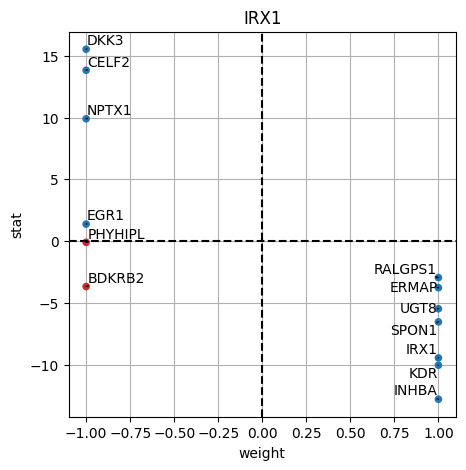

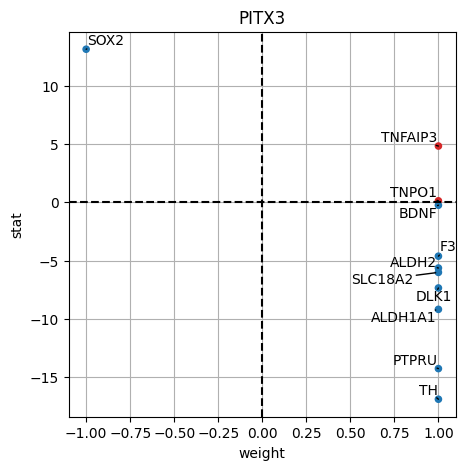

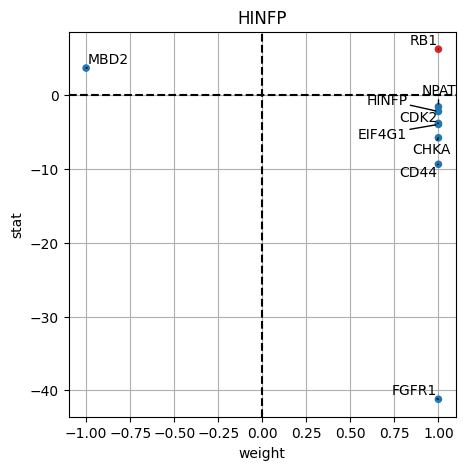

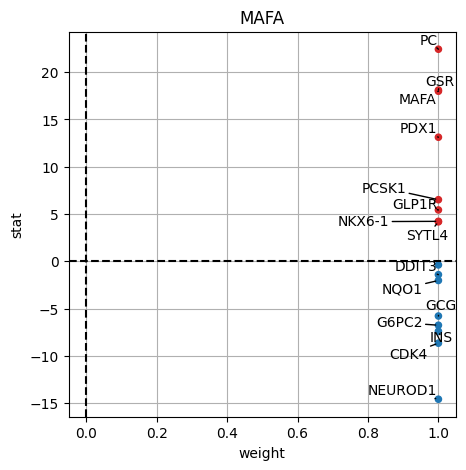

In [25]:
#activated
dc.plot_targets(results_df, stat='stat', source_name='FGF2', net=collectri, top=15,save='../figures/Mut/t1_FGF2_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='CTBP2', net=collectri, top=15,save='../figures/Mut/t1_CTBP2_targets.png')
#inhibited
dc.plot_targets(results_df, stat='stat', source_name='E2F1', net=collectri, top=15,save='../figures/Mut/t1_E2F1_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='HNF4A', net=collectri, top=15,save='../figures/Mut/t1_HNF4A_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='E2F3', net=collectri, top=15,save='../figures/Mut/t1_E2F3_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='HNF1A', net=collectri, top=15,save='../figures/Mut/t1_HNF1A_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='E2F2', net=collectri, top=15,save='../figures/Mut/t1_E2F2_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='GRHL2', net=collectri, top=15,save='../figures/Mut/t1_GRHL2_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='IRX1', net=collectri, top=15,save='../figures/Mut/t1_IRX1_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='PITX3', net=collectri, top=15,save='../figures/Mut/t1_PITX3_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='HINFP', net=collectri, top=15,save='../figures/Mut/t1_HINFP_targets.png')
#MAFA
dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,save='../figures/Mut/t1_MAFA_targets.png')

## Plot Network

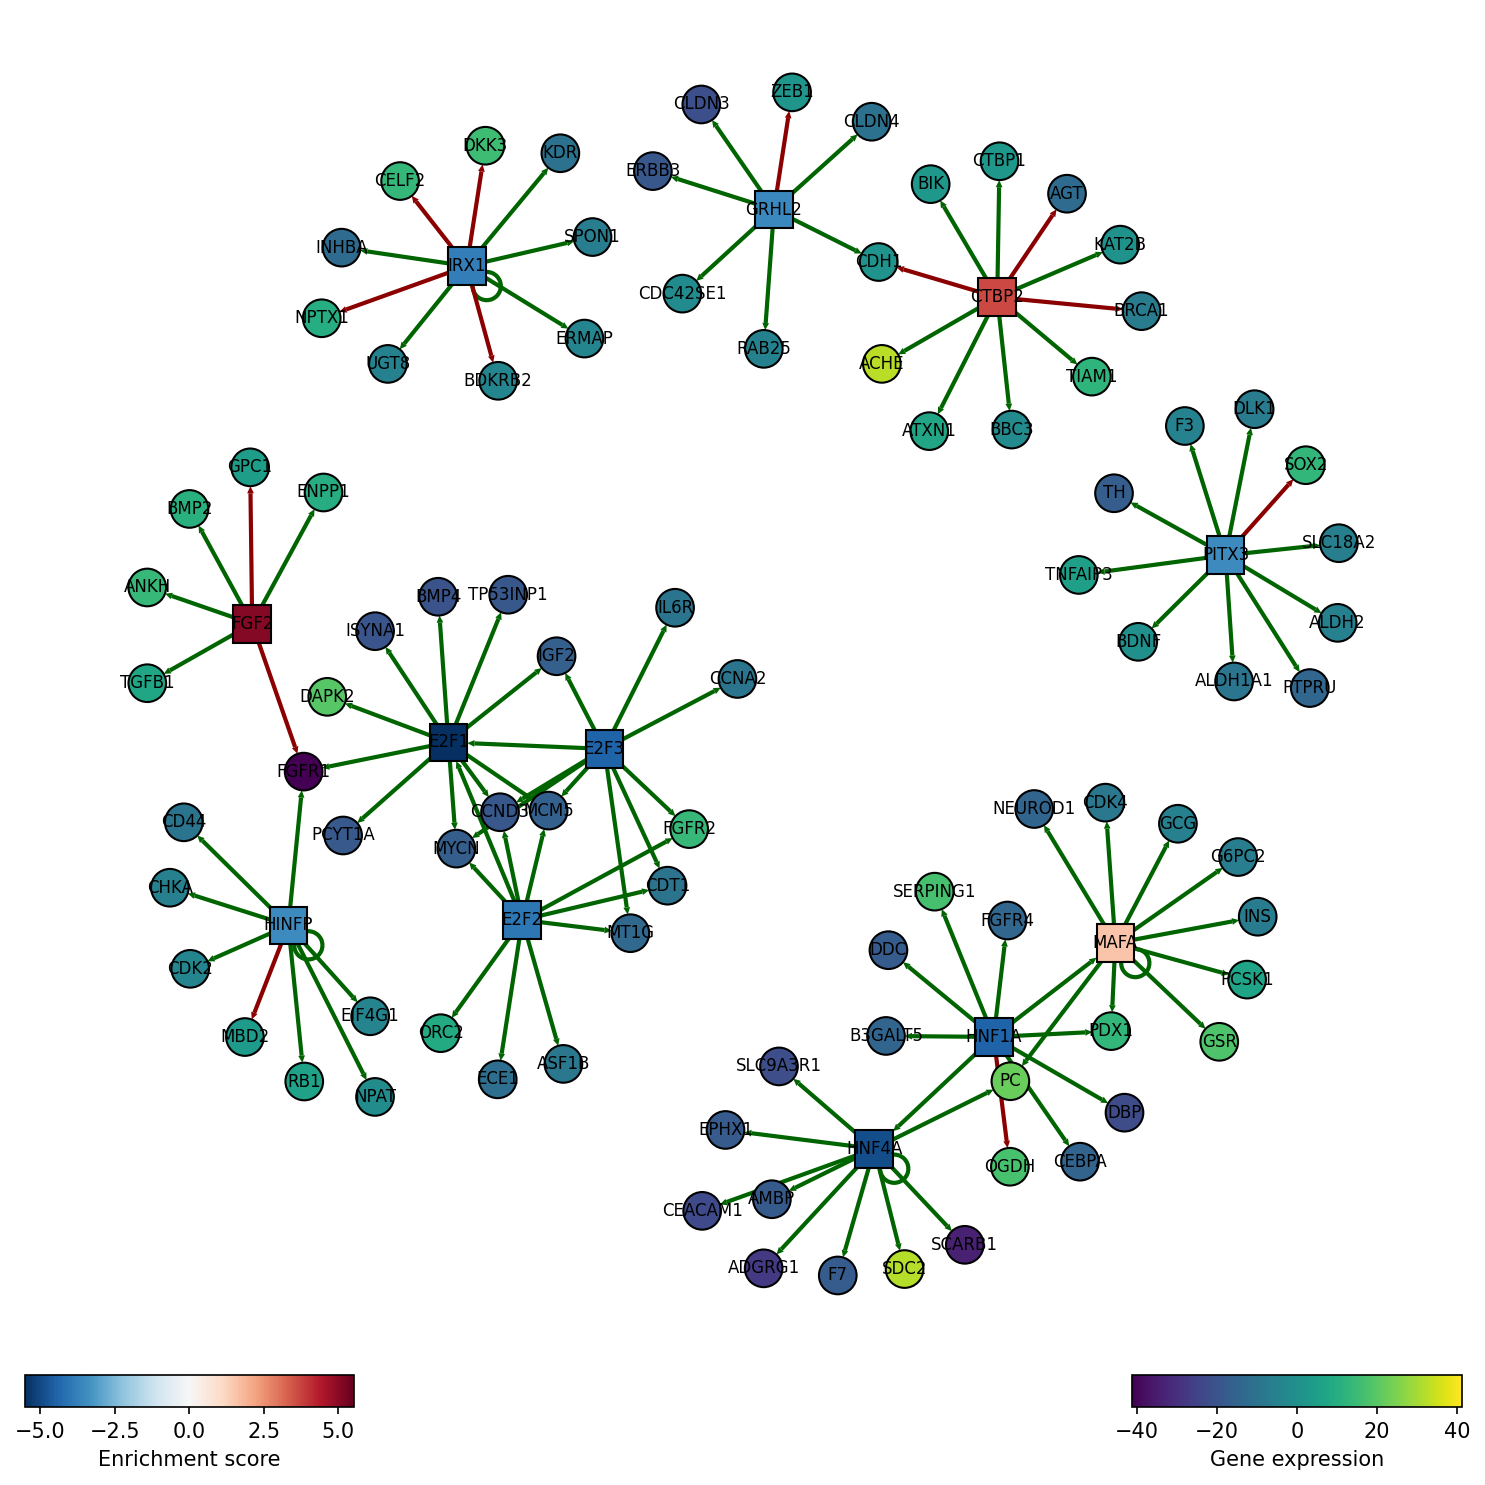

In [26]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=['FGF2', 'CTBP2', 'E2F1', 'HNF4A', 'E2F3', 'HNF1A', 'E2F2', 'GRHL2', 'IRX1', 'PITX3', 'HINFP', 'MAFA'],
    n_targets=10,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save = '../figures/Mut/t1_plot_networks.png'
)

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


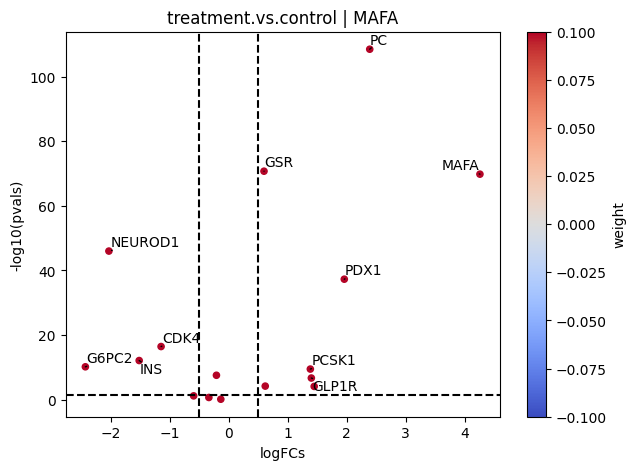

In [27]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [28]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


### Activity inference with multivariate Linear Model (MLM)

In [29]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 14787 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
treatment.vs.control,2.140378,0.241199,0.386841,3.196252,-4.701897,-0.245192,0.040919,-1.53619,-0.475227,-0.150428,0.418589,-0.758916,-2.422169,1.613071


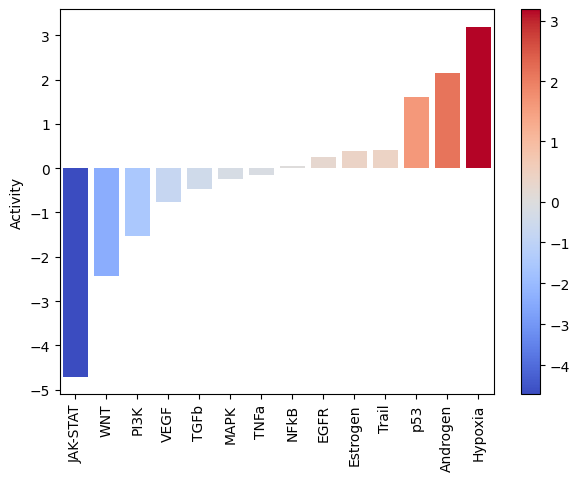

In [30]:
dc.plot_barplot(pathway_acts, 'treatment.vs.control', top=30, vertical=False,save='../figures/Mut/t1_pathway_activities.png')

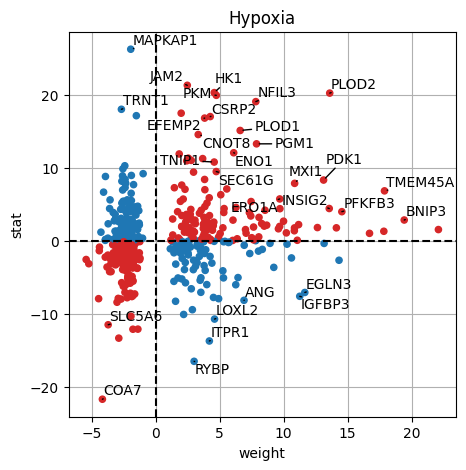

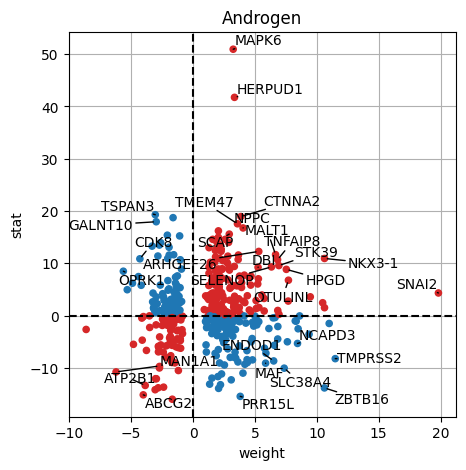

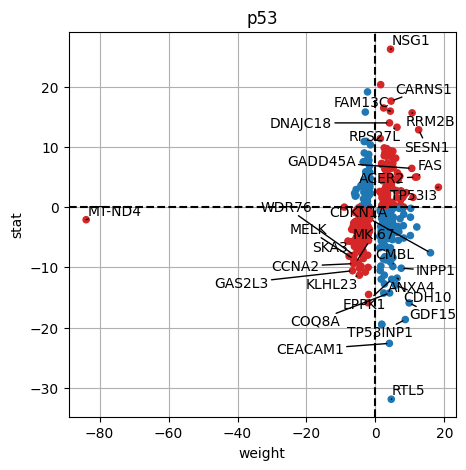

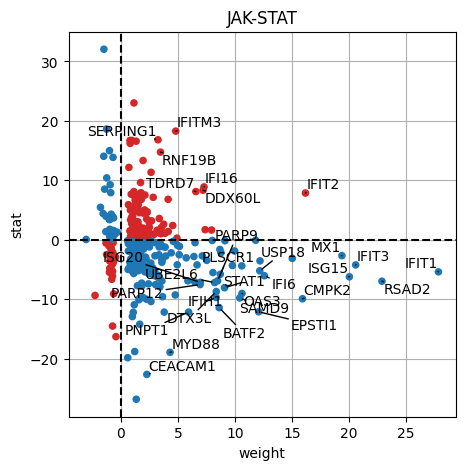

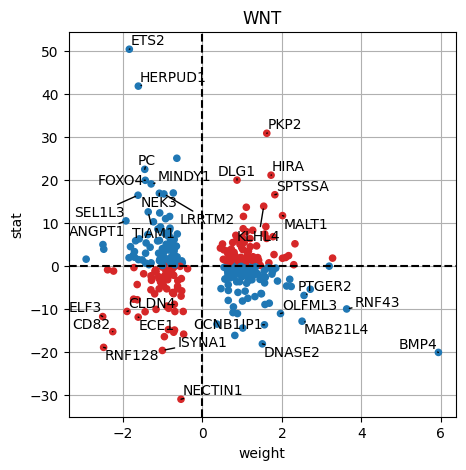

In [31]:
# increase activity
dc.plot_targets(results_df, stat='stat', source_name='Hypoxia', net=progeny, top=30,save='../figures/Mut/t1_Hypoxia_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='Androgen', net=progeny, top=30,save='../figures/Mut/t1_Androgen_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='p53', net=progeny, top=30,save='../figures/Mut/t1_p53_targets.png')
# decrease activity
dc.plot_targets(results_df, stat='stat', source_name='JAK-STAT', net=progeny, top=30,save='../figures/Mut/t1_JAK-STAT_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='WNT', net=progeny, top=30, save='../figures/Mut/t1_WNT_targets.png')

# Approach to investigate p53 -> PPI -> mechanism? -> ask -> Table with list of targets for each one of the pathways with statistics 

### Funtional enrichment of Biological Terms

In [ ]:
# The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
msigdb = dc.get_resource('MSigDB')
msigdb

In [ ]:
msigdb['collection'].unique()

In [ ]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

## ORA

In [ ]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

In [ ]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.4,
    figsize=(5, 10),
    save='../figures/Mut/t1_ORA.png'
)